# LogisticRegression

In [186]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot as plt

In [187]:
#Load the dataset
encoded_file_path = r"D:\CADT University\CADT-Y3\CodeAllSub\Capstone\Capstone-Project-I\data\processed\lyleab_file\encoded_cleaned_top15diseases.csv"
df = pd.read_csv(encoded_file_path)
df.head(2)

,Disease_Encoded,,',(,),",",[,],_,a,...,p,r,s,t,u,v,w,x,y,z
0,3,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1,3,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


Class Distribution:
 Disease_Encoded
3     120
10    120
0     120
2     120
13    120
14    120
4     120
5     120
6     120
12    120
1     120
11    120
9     120
7     120
8     120
Name: count, dtype: int64


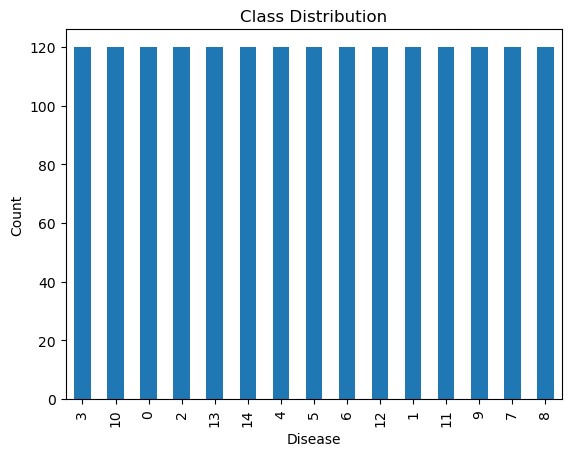

In [188]:
# Step 1: Check the class distribution
print("Class Distribution:\n", df['Disease_Encoded'].value_counts())
df['Disease_Encoded'].value_counts().plot(kind='bar', title='Class Distribution', xlabel='Disease', ylabel='Count')
plt.show()

In [189]:
# Step 2: Split the dataset into features (X) and target (y)
X = df.drop(columns=['Disease_Encoded']) 
y = df['Disease_Encoded']

In [190]:
# Step 3: Apply feature selection (SelectKBest)
selector = SelectKBest(chi2, k=36)  # Or try different values for k
X_selected = selector.fit_transform(X, y)

d:\Downlaod\APPLICATION\Anaconda\App_File\envs\condaEnv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=36 is greater than n_features=33. All the features will be returned.
  warnings.warn(


In [191]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

In [192]:
# Step 5: Apply SMOTE for oversampling the minority class in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [193]:
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(f"Class distribution after SMOTE:\n{dict(zip(unique, counts))}")

Class distribution after SMOTE:
{0: 84, 1: 84, 2: 84, 3: 84, 4: 84, 5: 84, 6: 84, 7: 84, 8: 84, 9: 84, 10: 84, 11: 84, 12: 84, 13: 84, 14: 84}


In [194]:
# # Step 6: Define Logistic Regression model with class weight 'balanced'
# model = LogisticRegression(solver='liblinear', class_weight='balanced', C=10, max_iter=1000)
# # model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=1000)
model = LogisticRegression(solver='liblinear', max_iter=2000, class_weight='balanced', C=10)
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(C=10, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

In [195]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 200, 500, 1000],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Best hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'liblinear'}


In [196]:
# Check misclassified instances
y_pred = best_model.predict(X_test)
misclassified_indices = (y_test == 4) & (y_pred != 4)
misclassified_indices = (y_test == 6) & (y_pred != 6)

print("True labels for misclassified instances:")
print(y_test[misclassified_indices])

print("Predicted labels for misclassified instances:")
print(pd.Series(y_pred[misclassified_indices]))


True labels for misclassified instances:
388     6
384     6
84      6
1703    6
532     6
938     6
85      6
230     6
1283    6
1148    6
389     6
1388    6
1748    6
1028    6
835     6
1268    6
686     6
1373    6
534     6
386     6
685     6
983     6
1253    6
1223    6
232     6
89      6
385     6
838     6
953     6
688     6
1493    6
968     6
1088    6
236     6
1763    6
237     6
Name: Disease_Encoded, dtype: int64
Predicted labels for misclassified instances:
0     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    4
20    4
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    4
29    4
30    4
31    4
32    4
33    4
34    4
35    4
dtype: int64


In [197]:
# Step 8: Evaluate the best model on the test set
best_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_model.predict(X_test)

# Step 9: Print performance metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8574074074074074

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        36
           1       1.00      1.00      1.00        36
           2       1.00      0.94      0.97        36
           3       0.95      1.00      0.97        36
           4       0.35      1.00      0.52        36
           5       1.00      1.00      1.00        36
           6       0.00      0.00      0.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.94      0.97        36
           9       1.00      1.00      1.00        36
          10       1.00      1.00      1.00        36
          11       1.00      1.00      1.00        36
          12       0.92      1.00      0.96        36
          13       1.00      1.00      1.00        36
          14       1.00      0.06      0.11        36

    accuracy                           0.86       540
   macro avg       0.87   

d:\Downlaod\APPLICATION\Anaconda\App_File\envs\condaEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Downlaod\APPLICATION\Anaconda\App_File\envs\condaEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Downlaod\APPLICATION\Anaconda\App_File\envs\condaEnv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [198]:
# Save the trained model and feature selector
import joblib
joblib.dump(best_model, 'logistic_regression_model.pkl')
joblib.dump(selector, 'selector.pkl')

['selector.pkl']

# Testing Model